In [1]:
import xarray as xr
from pathlib import Path

import functions.data_wrangling as data
import functions.eddy_feedback as ef

### Import data

In [2]:
data_path = Path('/home/links/ct715/data_storage/reanalysis/jra55_daily/djf_datasets')
nc_path = data_path / 'jra55_djf_uvtw_ubar_ep.nc'

In [3]:
ds = xr.open_mfdataset(
    nc_path,
    parallel=True,
    chunks={'time': 30}
)
ds 

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(30, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(30, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(30, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(30, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(30, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(30, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(30, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(30, 37, 73), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(30, 37, 73), meta=np.ndarray>

In [4]:
djf = data.seasonal_mean(ds, season='djf')
djf

<xarray.Dataset>
Dimensions:  (time: 60, level: 37, lat: 73, lon: 144)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1957-12-01 1958-12-01 ... 2016-12-01
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>

# North Atlantic winter jet

### First check longitudes coordinates

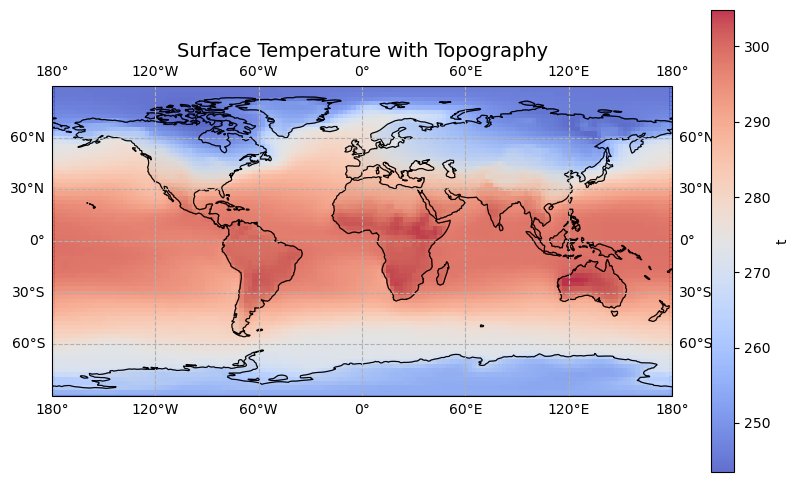

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Load your dataset (replace with your file path and variable names)
surface_temp = djf['t'].sel(level=1000).mean('time')  # Replace with your variable name

# Create the plot
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}  # Use PlateCarree for lat/lon data
)

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Default land feature

# Overlay surface temperature
surface_temp.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    alpha=0.8,  # Transparency for blending
    add_colorbar=True
)

# Add gridlines and coastlines
ax.coastlines(resolution='110m', color='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linestyle='--')

# Add a title
plt.title("Surface Temperature with Topography", fontsize=14)
plt.show()

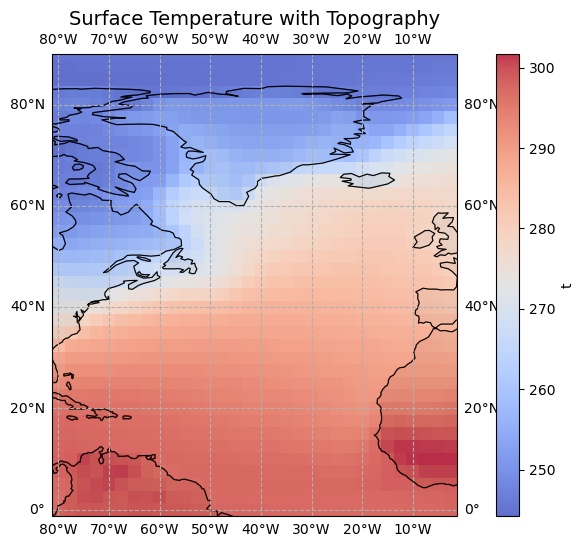

In [7]:
# Load your dataset (replace with your file path and variable names)
surface_temp = djf['t'].sel(level=1000).mean('time')  # Replace with your variable name
surface_temp = surface_temp.sel(lon=slice(280, 360))
surface_temp = surface_temp.sel(lat=slice(90,0))

# Create the plot
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}  # Use PlateCarree for lat/lon data
)

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Default land feature

# Overlay surface temperature
surface_temp.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    alpha=0.8,  # Transparency for blending
    add_colorbar=True
)

# Add gridlines and coastlines
ax.coastlines(resolution='110m', color='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linestyle='--')

# Add a title
plt.title("Surface Temperature with Topography", fontsize=14)
plt.show()


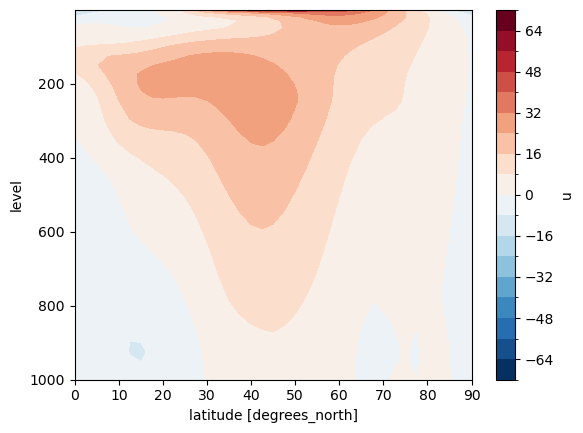

In [8]:
natl = djf.sel(
    lon=slice(280,360),
    lat=slice(90,0)
)
natl.u.mean(('lon', 'time')).plot.contourf(levels=20, yincrease=False)

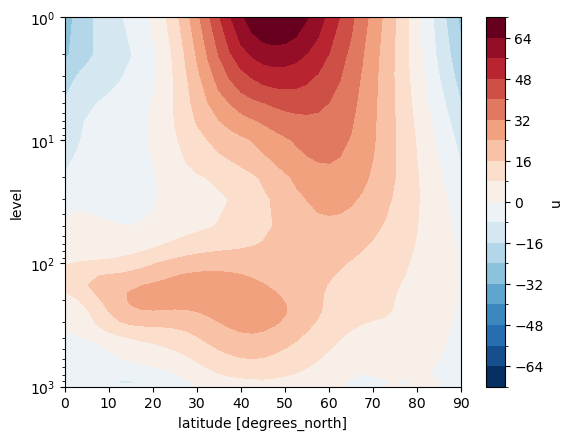

In [9]:
natl.u.mean(('lon', 'time')).plot.contourf(levels=20, yincrease=False, yscale='log')

# SH Summer Jet

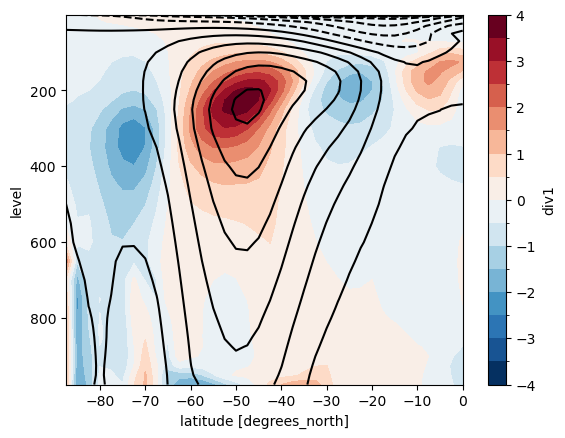

In [10]:
djf_sh = djf.sel(lat=slice(0,-87.5), level=slice(0, 975.0))
djf_sh.u.mean(('time', 'lon')).plot.contour(levels=20, yincrease=False, colors='k')
djf_sh.div1.mean('time').plot.contourf(levels=20, yincrease=False)

In [11]:
ef.calculate_efp(ds, data_type='reanalysis', calc_south_hemis=True)

ValueError: year must not be empty

In [ ]:
full_ds_path = Path.parent()
full_ds_path

### SH winter jet

In [13]:
jja = data.seasonal_mean(ds, season='jja')
jja

<xarray.Dataset>
Dimensions:  (time: 59, level: 37, lat: 73, lon: 144)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-06-01 1959-06-01 ... 2016-06-01
Data variables:
    v        (time, level, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    t        (time, level, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    omega    (time, level, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    u        (time, level, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    ep1      (time, level, lat) float64 nan nan nan nan nan ... nan nan nan nan
    ep2      (time, level, lat) float64 nan nan nan nan nan ... nan nan nan nan
    div1     (time, level, lat) float64 nan nan nan nan nan ... nan nan nan nan
    div2     (time, level, lat) float64 nan nan nan nan nan ... nan nan nan nan
    ubar     (time, level, lat) float32 nan nan nan nan nan ... nan nan nan nan